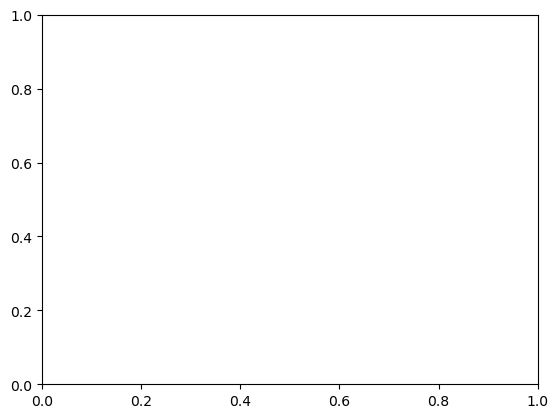

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import heapq

# Define the function to generate squares
def generate_squares(num_squares, size_range, canvas_size):
    squares = []
    for _ in range(num_squares):
        size = np.random.uniform(*size_range)
        x = np.random.uniform(0, canvas_size - size)
        y = np.random.uniform(0, canvas_size - size)
        squares.append((x, y, size))
    return squares

# Function to check if a point is inside any square
def is_point_in_squares(point, squares):
    px, py = point
    for (x, y, size) in squares:
        if x <= px <= x + size and y <= py <= y + size:
            return True
    return False

# Function to check if a line between two points intersects any square
def is_line_intersecting_squares(start, end, squares):
    for (x, y, size) in squares:
        if line_intersects_rect(start, end, (x, y, size)):
            return True
    return False

# Function to check if a line intersects a rectangle
def line_intersects_rect(start, end, rect):
    (x, y, size) = rect
    rect_points = [(x, y), (x + size, y), (x + size, y + size), (x, y + size)]
    for i in range(4):
        if lines_intersect(start, end, rect_points[i], rect_points[(i + 1) % 4]):
            return True
    return False

# Function to check if two lines intersect
def lines_intersect(p1, p2, p3, p4):
    def ccw(a, b, c):
        return (c[1] - a[1]) * (b[0] - a[0]) > (b[1] - a[1]) * (c[0] - a[0])
    return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)


# Define parameters
num_squares = 30  # Number of squares to generate
size_range = (10, 11)  # Range of square sizes
canvas_size = 100  # Size of the canvas
robot_diameter = 3  # Diameter of the robot

# Generate squares
squares = generate_squares(num_squares, size_range, canvas_size)

# Generate a random start point that does not overlap with any square
while True:
    start_point = (np.random.uniform(0, canvas_size), np.random.uniform(0, canvas_size))
    if not is_point_in_squares(start_point, squares):
        break

# Generate a random end point that does not overlap with any square
while True:
    end_point = (np.random.uniform(0, canvas_size), np.random.uniform(0, canvas_size))
    if not is_point_in_squares(end_point, squares):
        break

# Plot squares and points
fig, ax = plt.subplots()
for (x, y, size) in squares:
    square = plt.Rectangle((x, y), size, size, edgecolor='black', facecolor='blue', alpha=0.5)
    ax.add_patch(square)



In [14]:
# A* algorithm

# Defined openset as a heap
open_set = []
heapq.heappush(open_set, (0, start_point))

closed_set = set()

g_scores = {start_point: 0}
parents = {start_point: None}

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

h_scores = {start_point: heuristic(start_point, end_point)}
print(f"h(start, goal) = {h_scores}")

h(start, goal) = {(2.8748908596683775, 10.423107599900527): 160.97841976776607}


In [16]:
def get_neighbors(nodes):
    x, y = nodes
    neighbors = [
        (x - 1, y),
        (x + 1, y),
        (x, y - 1),
        (x, y + 1),
        (x - 1, y -1),
        (x - 1, y + 1),
        (x + 1, y - 1),
        (x + 1, y + 1)
    ]
    valid_neighbors = []
    for nx, ny in neighbors:
        if 0 <= nx < canvas_size and 0 <= ny < canvas_size and not is_point_in_squares((nx, ny), squares):
            valid_neighbors.append((nx, ny))
    return valid_neighbors

def a_star(start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score= {start: heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse
            return path
        
        for neighbor in get_neighbors(current):
            tentative_g_score = g_score[current] + 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                if neighbor not in open_set:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return None
    

In [17]:
# Find the path using A* algorithm
path = a_star(start_point, end_point)

# Plot start and end points
ax.plot(start_point[0], start_point[1], 'go', markersize=robot_diameter)  # Green start point
ax.plot(end_point[0], end_point[1], 'ro', markersize=robot_diameter)  # Red end point

# Plot the path
if path:
    path_x, path_y = zip(*path)
    ax.plot(path_x, path_y, 'r-')  # Red path

# Set plot parameters
ax.set_xlim(0, canvas_size)
ax.set_ylim(0, canvas_size)
ax.set_aspect('equal', adjustable='box')
plt.show()

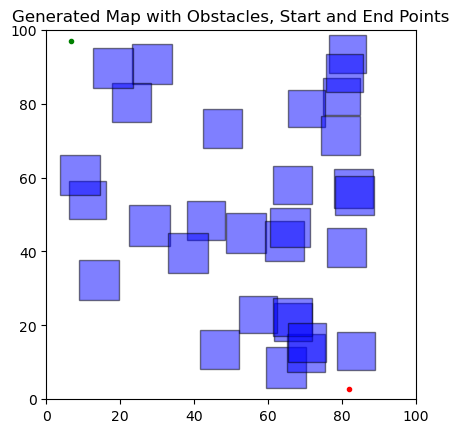

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import heapq
import pickle

# Define the function to generate squares
def generate_squares(num_squares, size_range, canvas_size):
    squares = []
    for _ in range(num_squares):
        size = np.random.uniform(*size_range)
        x = np.random.uniform(0, canvas_size - size)
        y = np.random.uniform(0, canvas_size - size)
        squares.append((x, y, size))
    return squares

# Function to check if a point is inside any square
def is_point_in_squares(point, squares):
    px, py = point
    for (x, y, size) in squares:
        if x <= px <= x + size and y <= py <= y + size:
            return True
    return False

# Define parameters
num_squares = 30  # Number of squares to generate
size_range = (10, 11)  # Range of square sizes
canvas_size = 100  # Size of the canvas
robot_diameter = 3  # Diameter of the robot

# Generate squares
squares = generate_squares(num_squares, size_range, canvas_size)

# Generate a random start point that does not overlap with any square
while True:
    start_point = (np.random.randint(0, canvas_size), np.random.randint(0, canvas_size))
    if not is_point_in_squares(start_point, squares):
        break

# Generate a random end point that does not overlap with any square
while True:
    end_point = (np.random.randint(0, canvas_size), np.random.randint(0, canvas_size))
    if not is_point_in_squares(end_point, squares):
        break

# 保存生成的地图和起点终点信息
map_data = {
    'squares': squares,
    'start_point': start_point,
    'end_point': end_point
}

# Plot the generated map to visualize
fig, ax = plt.subplots()
for (x, y, size) in squares:
    square = plt.Rectangle((x, y), size, size, edgecolor='black', facecolor='blue', alpha=0.5)
    ax.add_patch(square)

# Plot start and end points
ax.plot(start_point[0], start_point[1], 'go', markersize=robot_diameter)  # Green start point
ax.plot(end_point[0], end_point[1], 'ro', markersize=robot_diameter)  # Red end point

# Set plot parameters
ax.set_xlim(0, canvas_size)
ax.set_ylim(0, canvas_size)
ax.set_aspect('equal', adjustable='box')
plt.title("Generated Map with Obstacles, Start and End Points")
plt.show()

# 保存地图数据
with open('map_data.pkl', 'wb') as f:
    pickle.dump(map_data, f)


start_point: (6.5740062838987035, 96.9208777079874)
end_point: (81.98803909816982, 2.7275136469705363)
Current node: (6.5740062838987035, 96.9208777079874)
Adding neighbor: (5.5740062838987035, 96.9208777079874), g_score: 1, f_score: 171.60739687528798
Adding neighbor: (7.5740062838987035, 96.9208777079874), g_score: 1, f_score: 169.60739687528798
Adding neighbor: (6.5740062838987035, 95.9208777079874), g_score: 1, f_score: 169.60739687528798
Adding neighbor: (6.5740062838987035, 97.9208777079874), g_score: 1, f_score: 171.60739687528798
Adding neighbor: (5.5740062838987035, 95.9208777079874), g_score: 1, f_score: 170.60739687528798
Adding neighbor: (5.5740062838987035, 97.9208777079874), g_score: 1, f_score: 172.60739687528798
Adding neighbor: (7.5740062838987035, 95.9208777079874), g_score: 1, f_score: 168.60739687528798
Adding neighbor: (7.5740062838987035, 97.9208777079874), g_score: 1, f_score: 170.60739687528798
Current node: (7.5740062838987035, 95.9208777079874)
Adding neighbor

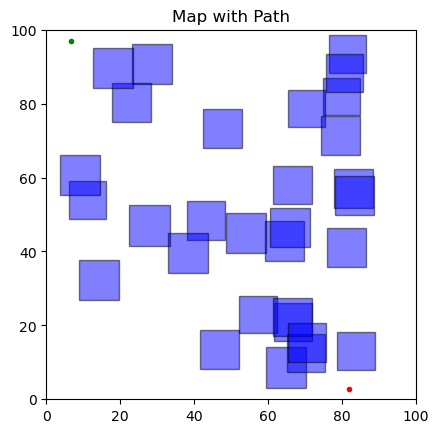

In [5]:
import pickle

# 加载保存的地图数据
with open('map_data.pkl', 'rb') as f:
    map_data = pickle.load(f)

squares = map_data['squares']
start_point = map_data['start_point']
end_point = map_data['end_point']
canvas_size = 100  # Size of the canvas
robot_diameter = 3  # Diameter of the robot

print("start_point:", start_point)
print("end_point:", end_point)

# A* Algorithm Implementation
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(node):
    x, y = node
    neighbors = [
        (x - 1, y), (x + 1, y),
        (x, y - 1), (x, y + 1),
        (x - 1, y - 1), (x - 1, y + 1),
        (x + 1, y - 1), (x + 1, y + 1)
    ]
    valid_neighbors = []
    for nx, ny in neighbors:
        if 0 <= nx < canvas_size and 0 <= ny < canvas_size and not is_point_in_squares((nx, ny), squares):
            valid_neighbors.append((nx, ny))
    return valid_neighbors

def a_star(start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]
        print("Current node:", current)  # 打印当前节点
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for neighbor in get_neighbors(current):
            tentative_g_score = g_score[current] + 1
            tentative_f_score = tentative_g_score + heuristic(neighbor, goal)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_f_score
                if neighbor not in [item[1] for item in open_set]:
                    heapq.heappush(open_set, (tentative_f_score, neighbor))
                print(f"Adding neighbor: {neighbor}, g_score: {g_score[neighbor]}, f_score: {f_score[neighbor]}")  # 添加邻居节点调试信息
    return None

# Find the path using A* algorithm
path = a_star(start_point, end_point)

if path is None:
    print("No path found")
else:
    print("Path found:", path)

# Plot the map with the found path
fig, ax = plt.subplots()
for (x, y, size) in squares:
    square = plt.Rectangle((x, y), size, size, edgecolor='black', facecolor='blue', alpha=0.5)
    ax.add_patch(square)

# Plot start and end points
ax.plot(start_point[0], start_point[1], 'go', markersize=robot_diameter)  # Green start point
ax.plot(end_point[0], end_point[1], 'ro', markersize=robot_diameter)  # Red end point

# Plot the path
if path:
    path_x, path_y = zip(*path)
    ax.plot(path_x, path_y, 'r-')  # Red path

# Set plot parameters
ax.set_xlim(0, canvas_size)
ax.set_ylim(0, canvas_size)
ax.set_aspect('equal', adjustable='box')
plt.title("Map with Path")
plt.show()
